In [2]:
%matplotlib inline
import pylab as pl
import numpy as np
from scipy.special import kn
from scipy.integrate import quad

In [7]:
# Maxwell-Juettner theta calibratior:
m = 1.
c = 1.

theta_array = np.arange(0.01, 1., 0.01)

def maxwell_juettner(p, theta):
    
    gamma = np.sqrt(1 + (p/(m*c))**2)
    
    f = 1./(4. * np.pi * m**3. * c**3. * kn(2, 1./theta)) * np.exp(- gamma/theta)
    
    return f

def nume_integrand(p, theta):
    
    nume_in = ((4. * np.pi * p**4) / np.sqrt(1. + p**2)) * maxwell_juettner(p, theta)
    
    return nume_in

def nume_inte(theta):
    
    nume, err_n = quad(lambda p: nume_integrand(p, theta), 0, np.inf)
    
    return nume

def domi_integrand(p, theta):
    
    domi_in = (4. * np.pi * p**2) * maxwell_juettner(p, theta)
    
    return domi_in

def domi_inte(theta):

    domi, err_d = quad(lambda p: domi_integrand(p, theta), 0, np.inf)
    
    return domi

def temperature_calibration(theta):
    
    theta_prim = (1. / 3.)* nume_inte(theta)/domi_inte(theta)
    
    return theta_prim



In [8]:
temperature_calibration(0.99)

0.99

domi_inte(1)

In [229]:
domi_inte(1)

2.0

In [224]:
theta_array

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
        0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
        0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
        0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99])

In [218]:
pl.plot(theta_array, temperature_calibration(theta_array))

error: Supplied function does not return a valid float.

In [151]:
temperature_calibration(0.5)

0.5511744053177432

In [88]:
kappa_distribution(p, 1., 1.) 

0.03298817927865608

In [99]:
kappa_distribution(0, 1., 100.)


0.017689554995542357

In [101]:
maxwell_juettner(0, 1.)

0.018017118981303166

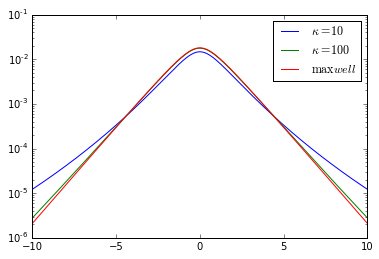

In [97]:
pl.semilogy(p, kappa_distribution(p, 1., 10.), label = '$\\kappa = 10$')
pl.semilogy(p, kappa_distribution(p, 1., 100.), label = '$\\kappa = 100$')
pl.semilogy(p, maxwell_juettner(p, 1.), label = '$\\maxwell$')
pl.legend()

In [ ]:
p.semilogy(p, maxwell_juettner(p, ))